In [14]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

# Teste T para duas amostras independentes

In [4]:
pip install scipy

In [5]:
import scipy

In [6]:
scipy.__version__

'1.6.0'

In [7]:
dados = {'X':[72,58,91,88,70,76,98,101,65,73,79,82,80,91,93,88,97,83,71,74], 
        'Y':[66,40,55,70,76,61,53,50,47,61,52,48,60,72,57,70,66,55,46,51]} 

In [10]:
df = pd.DataFrame(dados)

In [12]:
#Supondo duas amostra independentes que registram, por exemplo, uma nota em prova de acordo com método X e Y de estudo
# Deseja-se saber se o metodo de estudo interfere no resultado da prova
df.head()

,X,Y
0,72,66
1,58,40
2,91,55
3,88,70
4,70,76


In [27]:
statistic ,pvalue = stats.shapiro(df['X'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df['Y'])
print(pvalue)

0.8734249472618103
0.8089246153831482


In [13]:
print(df['X'].mean())
print(df['Y'].mean()) #verificando a média de cada método

81.5
57.8


<AxesSubplot:xlabel='variable', ylabel='value'>

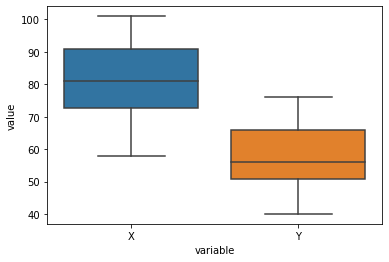

In [19]:
sns.boxplot(x="variable", y="value", data=pd.melt(df)) #comparando os valores pelo boxplot

In [21]:
from scipy.stats import bartlett

In [24]:
print(st.stdev(df['X']))
print(st.stdev(df['Y']))

11.736134035757395
9.838699100999074


In [25]:
stat, p = bartlett(df['X'], df['Y'])
print(p)

0.44916035305305846


In [12]:
stats.ttest_ind(df['X'], df['Y'], equal_var = False, alternative = 'two-sided')

Ttest_indResult(statistic=6.920824033665959, pvalue=3.6784617652225833e-08)

In [14]:
stats.ttest_ind(df['X'], df['Y'], equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=6.920824033665959, pvalue=1.8392308826112917e-08)

In [15]:
stats.ttest_ind(df['X'], df['Y'], equal_var = False, alternative = 'less')

Ttest_indResult(statistic=6.920824033665959, pvalue=0.9999999816076912)

# Teste T para duas amostras emparelhadas

In [29]:
dados = {'Antes':[220,212,227,234,204,209,211,245,237,250,208,224,220,218,208,205,227,207,222,213,210,234,240,227,229,224,204,
             210,215,228], 
        'Depois':[195,180,200,204,180,195,200,210,205,211,175,198,195,200,190,200,222,198,201,194,190,204,230,222,209,198,195,
                 190,201,210]}

In [30]:
df = pd.DataFrame(dados)

In [31]:
df.head()

,Antes,Depois
0,220,195
1,212,180
2,227,200
3,234,204
4,204,180


In [33]:
statistic ,pvalue = stats.shapiro(df['Antes'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df['Depois'])
print(pvalue)

0.10733503848314285
0.28344228863716125


In [19]:
print(df['Antes'].mean())
print(df['Depois'].mean())

220.73333333333332
200.06666666666666


<AxesSubplot:xlabel='variable', ylabel='value'>

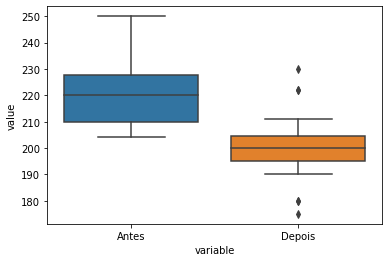

In [34]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

In [18]:
stats.ttest_rel(df['Antes'],df['Depois'],alternative='two-sided')

Ttest_relResult(statistic=11.953297138613197, pvalue=9.960437580616328e-13)

# One-Way ANOVA

In [43]:
from scipy.stats import f_oneway

In [35]:
dados = {'Unidade_1':[24,26,28,22,31,25,27,28,30,21,20,24], 
        'Unidade_2':[28,26,24,30,24,27,25,29,30,27,26,25],
        'Unidade_3':[29,25,24,26,20,22,22,27,20,26,24,25]}

In [36]:
df = pd.DataFrame(dados)
df.head()

,Unidade_1,Unidade_2,Unidade_3
0,24,28,29
1,26,26,25
2,28,24,24
3,22,30,26
4,31,24,20


In [37]:
statistic ,pvalue = stats.shapiro(df['Unidade_1'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df['Unidade_2'])
print(pvalue)
statistic ,pvalue = stats.shapiro(df['Unidade_3'])
print(pvalue)

0.922930121421814
0.32978665828704834
0.750328004360199


In [39]:
print(st.stdev(df['Unidade_1']))
print(st.stdev(df['Unidade_2']))
print(st.stdev(df['Unidade_3']))

3.4771984543464143
2.137330535547045
2.757908737804898


In [38]:
stat, p = bartlett(df['Unidade_1'], df['Unidade_2'],df['Unidade_3'])
print(p)

0.29524300365050327


In [40]:
print(df['Unidade_1'].mean())
print(df['Unidade_2'].mean())
print(df['Unidade_3'].mean())

25.5
26.75
24.166666666666668


<AxesSubplot:xlabel='variable', ylabel='value'>

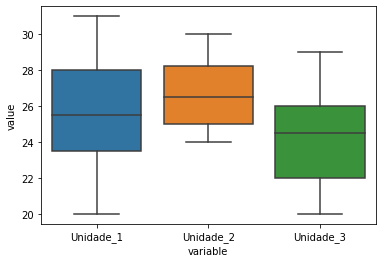

In [41]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

In [47]:
F, p = f_oneway(df['Unidade_1'], df['Unidade_2'], df['Unidade_3'])
print(p)

0.09955524346963146


# Teste McNemar